# Importing library

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Loading data

In [2]:
df=pd.read_csv(r"D:\Emk assignment\audi.csv")
display(df.head())
print(df.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0


(10668, 8)


# Checking corelations

In [3]:
df_corr=df.corr()
df_corr

,year,price,mileage,mpg,engineSize
year,1.000000,0.592581,-0.789667,-0.351281,-0.031582
price,0.592581,1.000000,-0.535357,-0.600334,0.591262
mileage,-0.789667,-0.535357,1.000000,0.395103,0.070710
mpg,-0.351281,-0.600334,0.395103,1.000000,-0.365621
engineSize,-0.031582,0.591262,0.070710,-0.365621,1.000000


# Plotting the corr

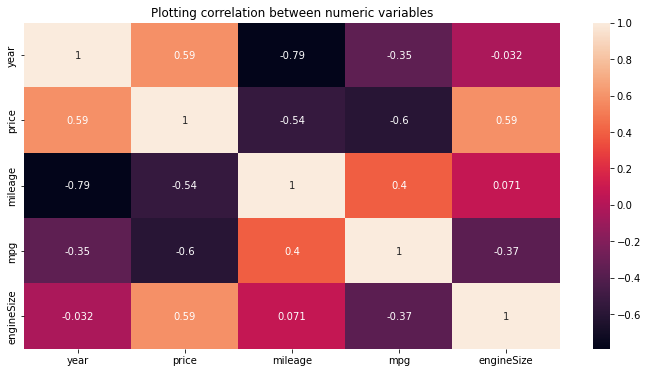

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(df_corr,annot=True)
plt.title("Plotting correlation between numeric variables")
plt.show()

# Separating target and feature variable

In [5]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')

In [6]:
features=['year','mileage','engineSize']    ########## removing 'mpg' due to low corelation ####
target=['price']
x=df[features]
y=df[target]

print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (10668, 3)
shape of y (10668, 1)


# Create train and test set

In [7]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8534, 3) (2134, 3) (8534, 1) (2134, 1)


# Model building

In [8]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [9]:
print("value of C (bias):",reg.intercept_)
print("value of Co efficient",reg.coef_)

value of C (bias): [-4463782.05352997]
value of Co efficient [[ 2.21441834e+03 -1.26244953e-01  1.19309651e+04]]


In [10]:
coef_df=pd.DataFrame({"feature":x.columns,"Coefficient":np.squeeze(reg.coef_)
    
})

In [11]:
coef_df

,feature,Coefficient
0,year,2214.418337
1,mileage,-0.126245
2,engineSize,11930.965053


# Prediction

In [12]:
y_pred=reg.predict(X_test)
y_pred

array([[ 9240.4451089 ],
       [25668.69459405],
       [30106.78397928],
       ...,
       [16724.74399787],
       [25892.65314109],
       [13405.00670759]])

In [13]:
y_test

,price
10442,9990
2907,22382
7388,28990
3016,30777
7890,14950
...,...
8606,31450
8977,12900
3673,16750
1034,21996


In [14]:
true=np.array(y_test)

In [15]:
true

array([[ 9990],
       [22382],
       [28990],
       ...,
       [16750],
       [21996],
       [ 9547]], dtype=int64)

In [16]:
ranges= list(range(len(true)))

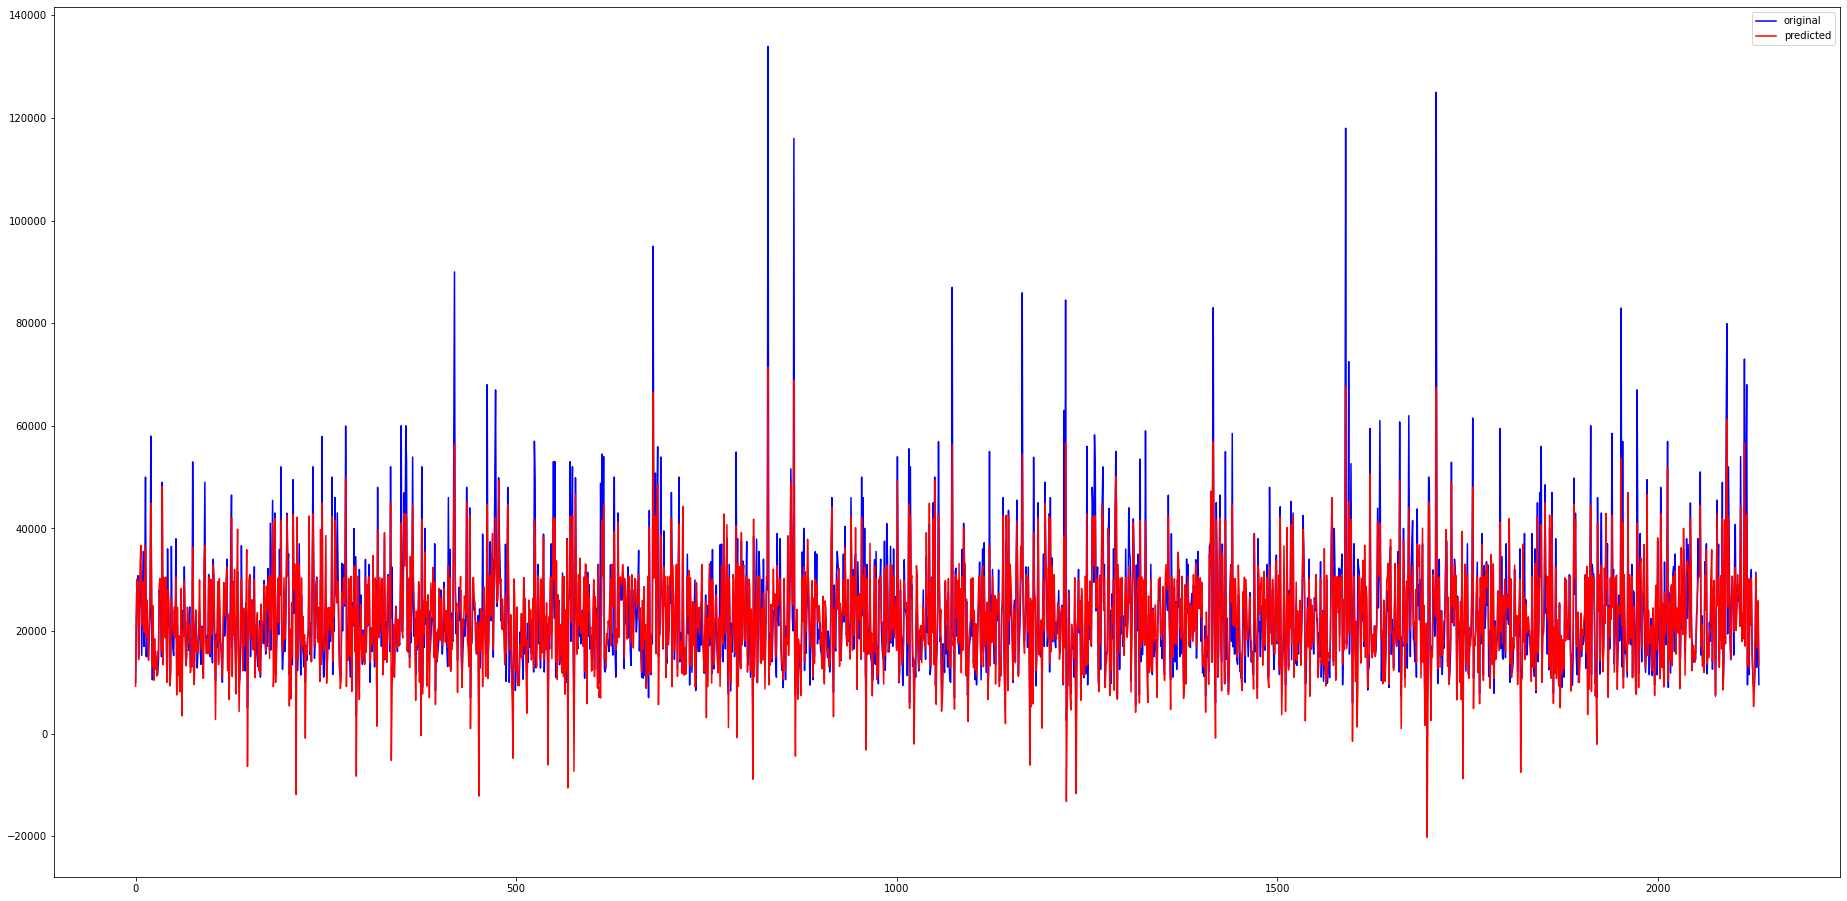

In [17]:
plt.figure(figsize=(32,16))
plt.plot(ranges, true, color="blue", label="original")
plt.plot(ranges, y_pred, color="red", label="predicted")
plt.legend()
plt.show() 

In [18]:
mae = metrics.mean_absolute_error(true, y_pred)
mape=mae*100
mse = metrics.mean_squared_error(true, y_pred)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(true, y_pred)

print("Results of sklearn.metrics:")

print("MAE:",mae)
print("MAE:",mape)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 3887.4328712114047
MAE: 388743.28712114046
MSE: 36918005.883947715
RMSE: 6076.018917346103
R-Squared: 0.7557193921157271
